In [1]:
# 코랩으로 돌리면 이거 실행하기 (코랩만)

!apt-get update

!apt-get install g++ openjdk-8-jdk python-dev python3-dev

!pip3 install JPype1-py3

!pip3 install konlpy

!JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"

'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'pip3'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'pip3'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'JAVA_HOME'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from konlpy.tag import Okt

In [3]:
train_data = pd.read_csv('result_1_100.csv', sep=",", encoding='utf-8')  # 파일 이름 바꾸기, 파일&코드 위치에 있기
train_data.head(10)

,Unnamed: 0,score,review
0,0,10,민주화운동 영화 중에서 제일 웰메이드로 만든거 같다 모든 아시아국들이 봤으면 좋겠다...
1,1,9,영화에서 현실성을 따지는 사람은 대체 뭘까?
2,2,7,후반부에 병원 탈출 방식이라던가 담배씬이라던가 너무 억지로 꿰어맞추는 부분등이 눈에...
3,3,10,NaN
4,4,10,보는 내내 개빡치네 독재정권 OOO들
5,5,10,최고에요 우울한시국에 잠깐이나마 즐길수있는 영화
6,6,9,"최근에 넷플릭스 영화중에 가장 재밌게 본 단순한 스토리를 실감나는 액션과 연출,연기..."
7,7,1,"과거 정부가 독재엿엇다 인정한다. 하지만 학생운동,운동권운동이 미화 됫다. 주사파사..."
8,8,1,평점 조작으로 말아먹은 영화고~ 휴대폰으로 보고 판단해야겠네;;일단 평점 조작한게...
9,9,1,이 영화때문에 막가파가 생겨서 사람죽고.. 사회 좀먹는 영화일세.. 좋은거는 아무것...


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   score       1000 non-null   int64 
 2   review      879 non-null    object
dtypes: int64(2), object(1)
memory usage: 23.6+ KB


In [5]:
train_data = train_data.dropna(how='any')

In [6]:
train_data[:3]

,Unnamed: 0,score,review
0,0,10,민주화운동 영화 중에서 제일 웰메이드로 만든거 같다 모든 아시아국들이 봤으면 좋겠다...
1,1,9,영화에서 현실성을 따지는 사람은 대체 뭘까?
2,2,7,후반부에 병원 탈출 방식이라던가 담배씬이라던가 너무 억지로 꿰어맞추는 부분등이 눈에...


In [7]:
len(train_data)

879

In [8]:
# label
def labeling(x):
    if x >= 7:
        x = 1
    elif x <= 4:
        x = 0
    else:
        x = None
    return x

train_data['score'] = train_data['score'].apply(labeling)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  879 non-null    int64  
 1   score       802 non-null    float64
 2   review      879 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 27.5+ KB


In [10]:
train_data = train_data.dropna(how='any')
train_data

,Unnamed: 0,score,review
0,0,1.0,민주화운동 영화 중에서 제일 웰메이드로 만든거 같다 모든 아시아국들이 봤으면 좋겠다...
1,1,1.0,영화에서 현실성을 따지는 사람은 대체 뭘까?
2,2,1.0,후반부에 병원 탈출 방식이라던가 담배씬이라던가 너무 억지로 꿰어맞추는 부분등이 눈에...
4,4,1.0,보는 내내 개빡치네 독재정권 OOO들
5,5,1.0,최고에요 우울한시국에 잠깐이나마 즐길수있는 영화
...,...,...,...
995,995,0.0,"장난스러운 키스, 나의 소녀시대 진짜 재밌게 봤는데 이번 영화는 진짜 뇌절했네 돈 ..."
996,996,1.0,영화를 몰입하게 하는 힘이 있다.레이는 음악가 사업가이며 시행착오 실수를 반복한다아...
997,997,1.0,이런 미친 영화 뭐하나 빼놓을 수 있는 장르가 없다.로맨스 액션 정치 뭐 다들어가있...
998,998,1.0,너무 울다가 나왔네요.. 아이를 키우고 있는 엄마라 더 감정이입이 되었던것 같습니다...


In [11]:
train_data['score'] = pd.to_numeric(train_data['score'], downcast='integer')

In [12]:
train_data['score'].value_counts()

1    584
0    218
Name: score, dtype: int64

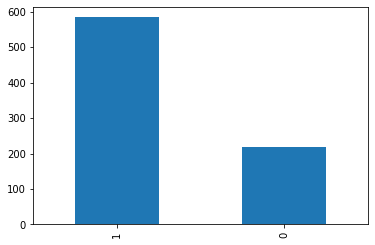

In [13]:
train_data['score'].value_counts().plot(kind='bar')

In [14]:
# 공백 data 삭제하기
# re.sub(r'[^a-zA-Z]', '', text) : 영어일 경우
# ㄱ~ㅎ: U3131 ~ U314E
# ㅏ~ㅣ:...
# 가~: UAC00...

In [15]:
train_data['review'] = train_data['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힇]", "")
train_data

,Unnamed: 0,score,review
0,0,1,민주화운동영화중에서제일웰메이드로만든거같다모든아시아국들이봤으면좋겠다아시아에서유일하게민...
1,1,1,영화에서현실성을따지는사람은대체뭘까
2,2,1,후반부에병원탈출방식이라던가담배씬이라던가너무억지로꿰어맞추는부분등이눈에거슬림박찬욱이분명...
4,4,1,보는내내개빡치네독재정권들
5,5,1,최고에요우울한시국에잠깐이나마즐길수있는영화
...,...,...,...
995,995,0,장난스러운키스나의소녀시대진짜재밌게봤는데이번영화는진짜뇌절했네돈아까움
996,996,1,영화를몰입하게하는이있다레이는음악가사업가이며시행착오실수를반복한다아내비의내조음악에대한재...
997,997,1,이런미친영화뭐하나빼놓을수있는장르가없다로맨스액션정치뭐다들어가있네최근본영화중가정감명깊다
998,998,1,너무울다가나왔네요아이를키우고있는엄마라더감정이입이되었던것같습니다너무가슴아프고삶이란뜻대...


In [16]:
train_data['review'].replace('', np.nan, inplace=True)
train_data.isnull().sum()

Unnamed: 0    0
score         0
review        4
dtype: int64

In [17]:
train_data = train_data.dropna(how='any')

In [18]:
train_data.isnull().sum()

Unnamed: 0    0
score         0
review        0
dtype: int64

# 종류 > 다들 한 개씩 골라서 돌리고, 저장된 파일보고 stopword 판별해서 리스트와 md 수정
- Kkma > 태완
- Komoran > 하선
- Hannanum > 나은
- Okt > 민정

In [19]:
okt = Okt() 

X_train = []
for sentence in train_data['review']:
    temp_x = []
    temp_x = okt.morphs(sentence, stem=True) # Tokenizing
    X_train.append(temp_x)
print(X_train[:5])

[['민주화', '운동', '영화', '중', '에서', '제일', '웰', '메이드', '로', '만들다', '같다', '모든', '아시아', '국', '들', '이', '보다', '좋다', '아시아', '에서', '유일하다', '민주화', '성공하다', '나라', '라는', '자부심', '을', '느끼다', '해주다', '영화'], ['영화', '에서', '현실', '성', '을', '따지다', '사람', '은', '대체', '뭘', '끄다'], ['후반', '부', '에', '병원', '탈출', '방식', '이', '라던가', '담배', '씬', '이', '라던가', '너무', '억지로', '꿰', '어', '맞추다', '부분', '등', '이', '눈', '에', '거슬리다', '박찬욱', '이분', '명', '봉준호', '보다는', '나은', '점', '이남', '의', '것안베', '끼다', '거', '스스로', '창작', '을', '하다', '한다는', '점', '그리고', '후반', '부', '뒷', '심', '이분', '명', '더', '나은', '데', '반면', '에', '봉준호', '는', '나쁘다', '의미', '로', '서태지', '류임', '올드보이', '때', '도', '그렇다', '이영화', '보고', '나다', '더', '잘만', '들', '수', '있다', '이렇다', '느낌', '이', '강하다', '프로덕션', '디자인', '은', '오스카', '수상하다', '납득', '이', '되다', '한', '수준', '이고', '하정우', '가', '옥에티', '임'], ['보다', '내내', '개', '빡치다', '네', '독재정', '권', '들다'], ['최고', '에요', '우울하다', '시국', '에', '잠깐', '이나마', '즐기다', '영화']]


In [20]:
# 저장해주세요!! 다영님~
# train_data.to_csv('data_preprocessing.csv', sep=',', encoding='utf-8', index=False)
pd.DataFrame(X_train).to_csv('after_okt.csv', sep=',', encoding='utf-8', index=False)

# 이거 전까지 돌려서 아래 stopword 고치기!!
<br>
## stopwords -> 한국어의 조사와 같이 의미가 없을 것 같은 단어 목록 <br>
- 여기에 추가하고 나서 아래 코드 고치기!! <br>
- stopwords=[여기에 적어오기]

In [21]:
# stopwords -> 한국어의 조사, 은,는,이,가,을,를,잘,도...
stopwords=['의','가','이','는','은','들','잘','좀','과','도','을','를','으로','한','하다','에']

# 여기 아래는 건들지 맙시다~~

In [22]:
# 불용어 제거, 형태소 토큰화 작업
X_train = []
for sentence in train_data['review']:
    temp_x = []
    temp_x = okt.morphs(sentence, stem=True) # Tokenizing
    temp_x = [word for word in temp_x if not word in stopwords] # 불용어
    X_train.append(temp_x)
print(X_train[:5])

[['민주화', '운동', '영화', '중', '에서', '제일', '웰', '메이드', '로', '만들다', '같다', '모든', '아시아', '국', '보다', '좋다', '아시아', '에서', '유일하다', '민주화', '성공하다', '나라', '라는', '자부심', '느끼다', '해주다', '영화'], ['영화', '에서', '현실', '성', '따지다', '사람', '대체', '뭘', '끄다'], ['후반', '부', '병원', '탈출', '방식', '라던가', '담배', '씬', '라던가', '너무', '억지로', '꿰', '어', '맞추다', '부분', '등', '눈', '거슬리다', '박찬욱', '이분', '명', '봉준호', '보다는', '나은', '점', '이남', '것안베', '끼다', '거', '스스로', '창작', '한다는', '점', '그리고', '후반', '부', '뒷', '심', '이분', '명', '더', '나은', '데', '반면', '봉준호', '나쁘다', '의미', '로', '서태지', '류임', '올드보이', '때', '그렇다', '이영화', '보고', '나다', '더', '잘만', '수', '있다', '이렇다', '느낌', '강하다', '프로덕션', '디자인', '오스카', '수상하다', '납득', '되다', '수준', '이고', '하정우', '옥에티', '임'], ['보다', '내내', '개', '빡치다', '네', '독재정', '권', '들다'], ['최고', '에요', '우울하다', '시국', '잠깐', '이나마', '즐기다', '영화']]


In [23]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
print(tokenizer.word_index)

{'영화': 1, '보다': 2, '너무': 3, '이다': 4, '좋다': 5, '없다': 6, '같다': 7, '있다': 8, '하': 9, '스토리': 10, '재밌다': 11, '다': 12, '되다': 13, '연기': 14, '생각': 15, '에서': 16, '로': 17, '않다': 18, '아니다': 19, '진짜': 20, '만': 21, '적': 22, '나': 23, '배우': 24, '들다': 25, '하고': 26, '와': 27, '평점': 28, '내': 29, '긴장감': 30, '정말': 31, '그': 32, '게': 33, '만들다': 34, '인': 35, '때': 36, '까지': 37, '보고': 38, '액션': 39, '그냥': 40, '이영화': 41, '최고': 42, '가다': 43, '연출': 44, '고': 45, '시간': 46, '요': 47, '못': 48, '정도': 49, '사람': 50, '나오다': 51, '왜': 52, '감독': 53, '느낌': 54, '네': 55, '것': 56, '자다': 57, '점': 58, '그렇다': 59, '오다': 60, '많다': 61, '처음': 62, '더': 63, '이런': 64, '개': 65, '분': 66, '대': 67, '주다': 68, '되어다': 69, '싶다': 70, '이나': 71, 'ㅠㅠ': 72, '지': 73, '인데': 74, '화': 75, '끝': 76, 'ㅋㅋ': 77, '많이': 78, '말': 79, '모르다': 80, '저': 81, '면': 82, '중': 83, '그리고': 84, '아깝다': 85, '재미있다': 86, '마지막': 87, '개봉': 88, '아쉽다': 89, '추천': 90, '부분': 91, '뻔하다': 92, '님': 93, '감동': 94, '라': 95, '주인공': 96, '어떻다': 97, '알다': 98, 'ㅠ': 99, '노잼': 100, '나다': 101, '장': 102, 

In [24]:
# token_size or vector_size
threshold = 3 # 빈도수
total_cnt = len(tokenizer.word_index) # 단어수
rare_cnt = 0 # 빈도수가 threshold보다 작은 단어수
total_freq = 0 # 훈련 data 전체 단어 빈도수 총 합
rate_freq = 0 # 빈도수가 threshold보다 작은 단어들의 총 합

# 단어와 빈도수의 pair를 key, value로 처리
for key, value in tokenizer.word_index.items():
    total_freq = total_freq + value
    # 단어 빈도수가 threschold 보다 작은 값 처리
    if (value < threshold):
        rare_cnt += 1
        rate_freq += value

In [26]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
print(X_train[:3]) #[[150, 12, 434, 5, 454, ...]]

[[611, 784, 1, 83, 16, 248, 1067, 1068, 17, 34, 7, 203, 1069, 1711, 2, 5, 1069, 16, 1712, 611, 785, 612, 279, 1713, 147, 157, 1], [1, 16, 204, 130, 1714, 50, 613, 495, 148], [421, 249, 1070, 614, 615, 786, 787, 224, 786, 3, 1071, 1715, 280, 422, 91, 423, 149, 1072, 1716, 788, 250, 616, 496, 1073, 58, 1074, 1717, 789, 131, 1075, 1718, 617, 58, 84, 421, 249, 1719, 1076, 788, 250, 63, 1073, 315, 1077, 616, 187, 251, 17, 1720, 1721, 1722, 36, 59, 41, 38, 101, 63, 205, 281, 8, 206, 54, 618, 1723, 1078, 1079, 1080, 1081, 13, 117, 118, 1082, 1724, 132]]


In [27]:
Y_train = np.array(train_data['score']) 

In [28]:
# 패딩 처리
# 최대 리뷰 길이, 평균 리뷰 길이 구하기
max_review_length = max(len(x) for x in X_train)
print("최대:", max_review_length)
mean_review_length = sum(map(len, X_train)) / len(X_train)
print("평균:", mean_review_length)


# plt.hist((len(s) for s in X_train), bin=50)
# plt.xlabel('length of samples')
# plt.ylabel('number of samples')

최대: 186
평균: 19.194235588972433


In [29]:
max_length = 30
X_train = pad_sequences(X_train, maxlen=max_length)

# LSTM을 이용한 리뷰 모델 생성

In [30]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Input
from tensorflow.keras.models import Model
# EarlyStopping : 지정 epochs 횟수 전에 과적합의 모습을 보이면 멈추게 함
# ModelCheckpoint : 이전 모델보다 성능이 좋을 때만 저장한다.
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [31]:
T = X_train.shape[1] # 30
i = Input(shape=(T,))
x = Embedding(vocab_size, 100)(i) 
x = LSTM(128)(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 30, 100)           403600    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 520,977
Trainable params: 520,977
Non-trainable params: 0
_________________________________________________________________


In [32]:
eStop = EarlyStopping(monitor='val_loss',
                      mode='min',
                      verbose = 1, # log 찍기
                      patience=5) # 5번 연속 떨어지면 멈춤

mCheck = ModelCheckpoint('best_model.h5',
                        monitor='val_acc',
                        mode='max',
                        verbose=1,
                        save_best_only=True)

In [33]:
eStop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mCheck = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', 
                     verbose=1, save_best_only=True)

In [34]:
X_train.shape

(798, 30)

In [35]:
Y_train.shape

(798,)

In [36]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train)
#                     , epochs=15)
#                     callbacks=[eStop, mCheck], batch_size=60, validation_split=0.2)

Train on 798 samples
798/798 [==============================] - 4s 5ms/sample - loss: 0.6070 - accuracy: 0.7218


In [37]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=1, validation_split=0.2, batch_size=60, callbacks=[eStop, mCheck])

Train on 638 samples, validate on 160 samples
638/638 [==============================] - 2s 4ms/sample - loss: 0.5549 - accuracy: 0.7288 - val_loss: 0.5523 - val_accuracy: 0.7188
